In [1]:
import sys
from pathlib import Path
import os 

# Assuming this notebook is in: explainability/notebooks/
# So we go two levels up to reach the root where 'explainability/' lives
project_root = Path.cwd().parents[1]  # cwd = explainability/notebooks/
sys.path.append(str(project_root))
os.chdir(project_root)

In [ ]:
from explainability.am.load_results import load_results

biomining_df = load_results("biomining")
transynergy_df = load_results("transynergy", transynergy_genes_csv_path="./external/drug_combination/data/genes/genes_2401_df.csv")

In [3]:
biomining_df.head()

,feature,value,regularization,minimax
0,ABL,3.000907,l2,max
1,ABLb,3.773006,l2,max
2,CSF1R,1.615128,l2,max
3,CSF1Rb,1.976261,l2,max
4,EGFR,2.736827,l2,max


In [4]:
transynergy_df.head()

,feature,value,regularization,minimax
0,GDF5_A,-4.177685,l2,max
1,NCOA3_A,-1.187996,l2,max
2,NRIP1_A,-4.515692,l2,max
3,AMER1_A,-2.605516,l2,max
4,LZTR1_A,-0.947376,l2,max


In [5]:
biomining_max_df = biomining_df[biomining_df.minimax == "max"]
transynergy_max_df = transynergy_df[transynergy_df.minimax == "max"]

biomining_min_df = biomining_df[biomining_df.minimax == "min"]
transynergy_min_df = transynergy_df[transynergy_df.minimax == "min"]

In [6]:
def compute_mean_feature_importance(df):
    return df.groupby('feature', as_index=True).agg({'value': 'mean'}).sort_values(by='value', ascending=False)


biomining_max_fi_df = compute_mean_feature_importance(biomining_max_df)
transynergy_max_fi_df = compute_mean_feature_importance(transynergy_max_df)

biomining_min_fi_df = compute_mean_feature_importance(biomining_min_df)
transynergy_min_df = compute_mean_feature_importance(transynergy_min_df)

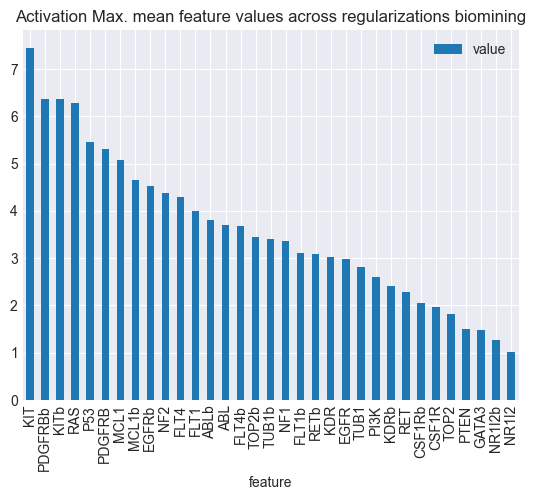

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

biomining_max_fi_df.plot(kind="bar")
plt.title('Activation Max. mean feature values across regularizations biomining')
plt.show()

<Axes: xlabel='feature'>

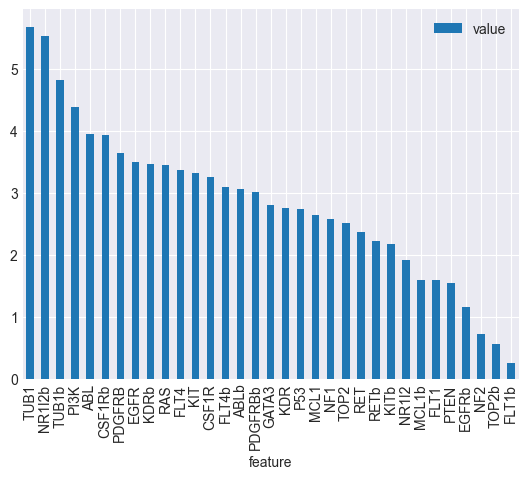

In [8]:
biomining_min_fi_df.plot(kind="bar")

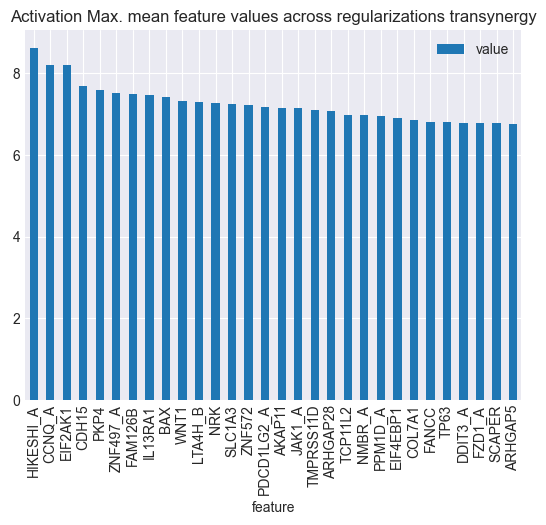

In [9]:
transynergy_max_fi_df.iloc[:30].plot(kind="bar")
plt.title('Activation Max. mean feature values across regularizations transynergy')
plt.show()